# Project - Customer Group Data Analytics
Journey into Consumer Insights with Synthetic Data <br>
Name: Zihan Luo  <br>
Date: FL23

## Section 0: Import Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
shopping_data = pd.read_csv('shopping_trends.csv')

In [4]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
salary_data = pd.read_excel('US Average and Median Salary by State in 2022.xlsx')
salary_data.head()

,State,Average,Median
0,Alabama,"$44,930","$52,138"
1,Alaska,"$59,290","$67,010"
2,Arizona,"$50,930","$58,462"
3,Arkansas,"$42,690","$48,882"
4,California,"$61,290","$65,895"


In [6]:
data = pd.merge(shopping_data, salary_data, how='outer', left_on='Location', right_on='State')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,State,Average,Median
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly,Kentucky,"$44,020","$49,719"
1,28.0,56.0,Male,Shorts,Clothing,56.0,Kentucky,L,Cyan,Summer,...,Debit Card,Next Day Air,Yes,Yes,7.0,Bank Transfer,Every 3 Months,Kentucky,"$44,020","$49,719"
2,45.0,39.0,Male,Hat,Accessories,53.0,Kentucky,S,Silver,Summer,...,Bank Transfer,Free Shipping,Yes,Yes,45.0,PayPal,Weekly,Kentucky,"$44,020","$49,719"
3,119.0,50.0,Male,Sweater,Clothing,45.0,Kentucky,L,Orange,Fall,...,Bank Transfer,2-Day Shipping,Yes,Yes,27.0,Cash,Bi-Weekly,Kentucky,"$44,020","$49,719"
4,131.0,44.0,Male,Scarf,Accessories,39.0,Kentucky,L,Violet,Fall,...,Credit Card,Next Day Air,Yes,Yes,13.0,PayPal,Fortnightly,Kentucky,"$44,020","$49,719"


In [7]:
data.drop('State', axis=1, inplace = True)

In [8]:
data.dropna(inplace = True)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Average,Median
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly,"$44,020","$49,719"
1,28.0,56.0,Male,Shorts,Clothing,56.0,Kentucky,L,Cyan,Summer,...,Yes,Debit Card,Next Day Air,Yes,Yes,7.0,Bank Transfer,Every 3 Months,"$44,020","$49,719"
2,45.0,39.0,Male,Hat,Accessories,53.0,Kentucky,S,Silver,Summer,...,Yes,Bank Transfer,Free Shipping,Yes,Yes,45.0,PayPal,Weekly,"$44,020","$49,719"
3,119.0,50.0,Male,Sweater,Clothing,45.0,Kentucky,L,Orange,Fall,...,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,27.0,Cash,Bi-Weekly,"$44,020","$49,719"
4,131.0,44.0,Male,Scarf,Accessories,39.0,Kentucky,L,Violet,Fall,...,Yes,Credit Card,Next Day Air,Yes,Yes,13.0,PayPal,Fortnightly,"$44,020","$49,719"


# Section 1: Analyzing Payment Methods Across Different Age Segments
#### (No Significant Relationship Found, Focus Shifted to Next Analysis)

In [9]:
data_1 = data.copy()

In [10]:
data_1.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Average', 'Median'],
      dtype='object')

## 1.1 distribution of customer ages in the dataset

#### 1.11 Initiating Descriptive Statistical Analysis: 

In [11]:
data_1['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

#### 1.12 Interpreting Descriptive Statistics:

In [ ]:
# From the descriptive statistics, we observe that the age of our customers ranges from 18 to 70 years, with an average age of 44.
# This indicates that our dataset encompasses a broad age spectrum, making it representative of various age groups.

#### 1.13 Presenting the Age Distribution Chart:

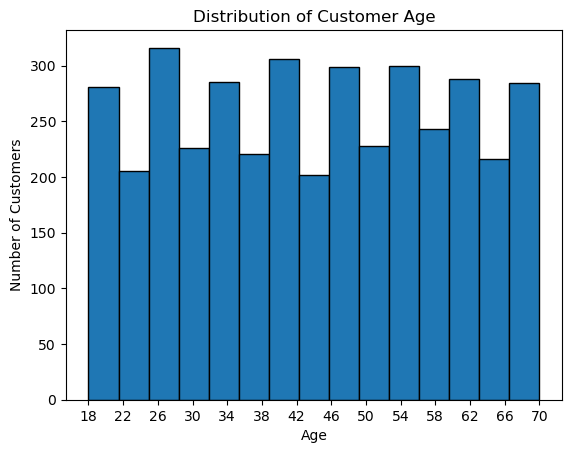

In [33]:
plt.hist(data_1['Age'], bins=15, edgecolor='k')
plt.title("Distribution of Customer Age")
plt.ylabel("Number of Customers")
plt.xlabel('Age')

max_age = int(max(data_1['Age']))
plt.xticks(range(18, max_age + 1, 4))

plt.show()

#### 1.14 Explaining the Purpose and Findings of the Distribution Chart:

In [ ]:
# The purpose of this distribution chart is to visually demonstrate the customer count across different age brackets.
# Our observation from the chart reveals a relatively uniform distribution of customers across all ages,
# suggesting that our dataset is well-balanced in terms of age representation. 
# This uniformity reinforces the validity of conducting a segmented age-based analysis.

In [ ]:
# Based on these insights, we proceed to segment the customers into distinct age groups.
# This segmentation will enable to conduct a more nuanced analysis of customer behavior and preferences across different age categories.

## 1.2 Age Segmentation

#### 1.21 Explaining 

In [ ]:
# To delve deeper into the behavior of consumers across different age groups, we have segmented the customer age data. 
# This segmentation is based on standard sociological age categorizations: Young Adults (18-35 years), Middle-Aged (36-55 years), 
# and Seniors (56 years and above). Such segmentation aids us in more precisely identifying the preferences and behavioral patterns of customers in each age bracket.

#### 1.22 Implementing Age Segmentation

In [12]:
import pandas as pd

bins = [17, 35, 55, max(data['Age'])]
labels = ['Young Adult', 'Middle-Aged', 'Seniors']
data_1['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

#### 1.23 Checking the Results of the Segmentation

In [13]:
data_1['Age Group'].value_counts()

Middle-Aged    1482
Young Adult    1313
Seniors        1105
Name: Age Group, dtype: int64

In [14]:
data_1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Average,Median,Age Group
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Credit Card,Express,Yes,Yes,14.0,Venmo,Fortnightly,"$44,020","$49,719",Middle-Aged
1,28.0,56.0,Male,Shorts,Clothing,56.0,Kentucky,L,Cyan,Summer,...,Debit Card,Next Day Air,Yes,Yes,7.0,Bank Transfer,Every 3 Months,"$44,020","$49,719",Seniors
2,45.0,39.0,Male,Hat,Accessories,53.0,Kentucky,S,Silver,Summer,...,Bank Transfer,Free Shipping,Yes,Yes,45.0,PayPal,Weekly,"$44,020","$49,719",Middle-Aged
3,119.0,50.0,Male,Sweater,Clothing,45.0,Kentucky,L,Orange,Fall,...,Bank Transfer,2-Day Shipping,Yes,Yes,27.0,Cash,Bi-Weekly,"$44,020","$49,719",Middle-Aged
4,131.0,44.0,Male,Scarf,Accessories,39.0,Kentucky,L,Violet,Fall,...,Credit Card,Next Day Air,Yes,Yes,13.0,PayPal,Fortnightly,"$44,020","$49,719",Middle-Aged


## 1.3 Cross-tabulation

#### 1.31 Computation of the frequency and proportion of each payment method within these age segments.

In [15]:
payment_method_counts = pd.crosstab(data_1['Age Group'], data['Payment Method'])

payment_method_proportions = payment_method_counts.div(payment_method_counts.sum(axis=1), axis=0)

payment_method_counts

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Age Group,,,,,,
Young Adult,213,217,222,227,220,214
Middle-Aged,244,237,277,241,240,243
Seniors,175,194,197,165,178,196


In [16]:
payment_method_proportions

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Age Group,,,,,,
Young Adult,0.162224,0.165270,0.169078,0.172887,0.167555,0.162986
Middle-Aged,0.164642,0.159919,0.186910,0.162618,0.161943,0.163968
Seniors,0.158371,0.175566,0.178281,0.149321,0.161086,0.177376


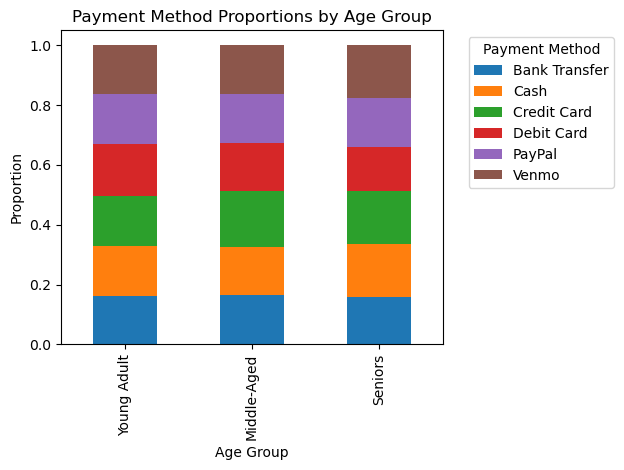

In [52]:
payment_method_proportions.plot(kind='bar', stacked=True)

plt.title('Payment Method Proportions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### 1.32 Section Summary

After analyzing the frequency of various payment methods across different age groups, we observed that the frequency distribution was relatively uniform across all age groups. This uniformity can be attributed to the presence of multiple payment options of similar nature 
in the dataset, such as 'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', and 'Venmo'. To obtain a more nuanced understanding of payment preferences, we will consolidate similar payment methods and reanalyze the data. This process of refinement is crucial in revealing more significant differences and trends that might be obscured by the granular categorization of payment methods.

## 1.4 Integrate Payment Method Categories

In [17]:
import pandas as pd

data_1['Payment Method'] = data_1['Payment Method'].replace(['Credit Card', 'Debit Card'], 'Card Payment')
data_1['Payment Method'] = data_1['Payment Method'].replace(['PayPal', 'Venmo'], 'Digital Wallets')

payment_method_counts = pd.crosstab(data_1['Age Group'], data_1['Payment Method'])
payment_method_proportions = payment_method_counts.div(payment_method_counts.sum(axis=1), axis=0)

payment_method_proportions

Payment Method,Bank Transfer,Card Payment,Cash,Digital Wallets
Age Group,,,,
Young Adult,0.162224,0.341965,0.165270,0.330541
Middle-Aged,0.164642,0.349528,0.159919,0.325911
Seniors,0.158371,0.327602,0.175566,0.338462


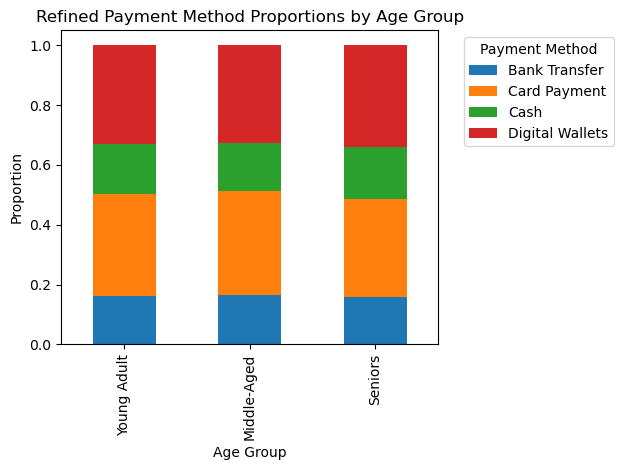

In [18]:
payment_method_proportions.plot(kind='bar', stacked=True)
plt.title('Refined Payment Method Proportions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 1.5 Hypothesis Testing

In [ ]:
H0: there is no significant difference in payment methods among different age groups.
H1: there is a significant difference in payment methods among different age groups.

In [56]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(payment_method_counts)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

Chi-square Statistic: 2.2999569573252443
P-value: 0.8901496239339308


In [ ]:
Since P-value: 0.8901496239339308 > 0.05
Thus we fail to reject the null hypothesis.
There is no significant difference in payment methods among different age groups.

In [57]:
data_1.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Average', 'Median', 'Age Group'],
      dtype='object')

## 1.6 Payment Method Distribution Over ALL

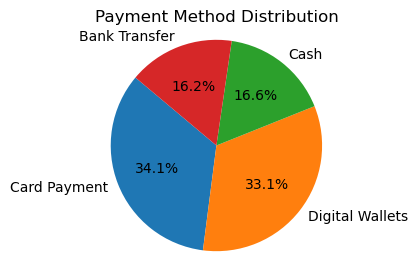

In [61]:
payment_counts = data_1['Payment Method'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')
plt.axis('equal')  
plt.show()

In [62]:
payment_counts

Card Payment       1329
Digital Wallets    1291
Cash                648
Bank Transfer       632
Name: Payment Method, dtype: int64

#### Section Summary

In the Payment Method Distribution Analysis, we visualized the distribution of different payment methods across our dataset. The results indicate that Card Payment is the most prevalent payment method, constituting 34.1% of the total. Following closely behind, Digital Wallets account for 33.1% of the payments, while Cash Bank and Transfer make up 16.6% and 16.2% respectively. These findings provide valuable insights into the prevalence of payment methods among our customers, with Card Payment and Digital Wallets being the most commonly used options.

## 1.7 Analysis of Preferred Payment Method

#### Given earlier analysis, which showed that payment methods did not vary significantly among different age groups, now turn to the analysis of 'Preferred Payment Method.' 

In [19]:
data_1['Preferred Payment Method'] = data_1['Preferred Payment Method'].replace(['Credit Card', 'Debit Card'], 'Card Payment')
data_1['Preferred Payment Method'] = data_1['Preferred Payment Method'].replace(['PayPal', 'Venmo'], 'Digital Wallets')

pre_payment_method_counts = pd.crosstab(data_1['Age Group'], data_1['Preferred Payment Method'])
pre_payment_method_proportions = pre_payment_method_counts.div(pre_payment_method_counts.sum(axis=1), axis=0)

pre_payment_method_proportions

Preferred Payment Method,Bank Transfer,Card Payment,Cash,Digital Wallets
Age Group,,,,
Young Adult,0.165270,0.328256,0.172125,0.334349
Middle-Aged,0.151822,0.334008,0.164642,0.349528
Seniors,0.153846,0.344796,0.180995,0.320362


In [ ]:
H0: there is no significant difference in preferred payment methods among different age groups.
H1: there is a significant difference in preferred  payment methods among different age groups.

In [71]:
chi2, p_value, dof, expected = chi2_contingency(pre_payment_method_counts)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

Chi-square Statistic: 4.0018810286035285
P-value: 0.6764218466629897


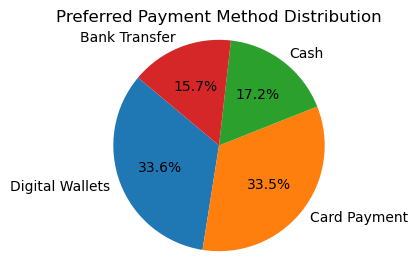

In [73]:
pre_payment_counts = data_1['Preferred Payment Method'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(pre_payment_counts, labels=pre_payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Payment Method Distribution')
plt.axis('equal')  
plt.show()

#### Section Summary

From the result ,it is also similar as "Payment Method" in different age segments.

## 2. Customer Value Data Analysis

#### Utilizing silhouette_score method learned from Exercise 6 to determine the optimal number of clusters.
#### Next, apply the K-means clustering algorithm to segment the data for different types of customers groups.
#### Analyze the date of different segments to define the customer group name and make corresponding marketing strategy.
#### Put the label name of customer groups and strategy as a new group back into the original data.
#### Generated a new Excel spreadsheet saved to the local computer. This spreadsheet contains multiple sheets, each corresponding to a distinct customer segment. Upon opening the file, users can conveniently access the categorized data by selecting the relevant sheet that represents a specific customer segment and check the related marketing strategy in the columns.

### 2.1 Select relevant columns from the original DataFrame and Data Preprocessing

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "5"
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
data_1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Average,Median,Age Group
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Card Payment,Express,Yes,Yes,14.0,Digital Wallets,Fortnightly,"$44,020","$49,719",Middle-Aged
1,28.0,56.0,Male,Shorts,Clothing,56.0,Kentucky,L,Cyan,Summer,...,Card Payment,Next Day Air,Yes,Yes,7.0,Bank Transfer,Every 3 Months,"$44,020","$49,719",Seniors
2,45.0,39.0,Male,Hat,Accessories,53.0,Kentucky,S,Silver,Summer,...,Bank Transfer,Free Shipping,Yes,Yes,45.0,Digital Wallets,Weekly,"$44,020","$49,719",Middle-Aged
3,119.0,50.0,Male,Sweater,Clothing,45.0,Kentucky,L,Orange,Fall,...,Bank Transfer,2-Day Shipping,Yes,Yes,27.0,Cash,Bi-Weekly,"$44,020","$49,719",Middle-Aged
4,131.0,44.0,Male,Scarf,Accessories,39.0,Kentucky,L,Violet,Fall,...,Card Payment,Next Day Air,Yes,Yes,13.0,Digital Wallets,Fortnightly,"$44,020","$49,719",Middle-Aged


In [41]:
selected_columns = ['Customer ID', 'Purchase Amount (USD)', 'Discount Applied','Previous Purchases', 'Frequency of Purchases']
d_new = data_1[selected_columns].copy()
d_new.head()

,Customer ID,Purchase Amount (USD),Discount Applied,Previous Purchases,Frequency of Purchases
0,1.0,53.0,Yes,14.0,Fortnightly
1,28.0,56.0,Yes,7.0,Every 3 Months
2,45.0,53.0,Yes,45.0,Weekly
3,119.0,45.0,Yes,27.0,Bi-Weekly
4,131.0,39.0,Yes,13.0,Fortnightly


In [42]:
frequency_mapping2 = {
    'Fortnightly': 26,         
    'Every 3 Months': 4,       
    'Weekly': 52,              
    'Bi-Weekly': 26,           
    'Monthly': 12,             
    'Annually': 1,            
    'Quarterly': 4           
}

In [43]:
d_new['Frequency of Purchases'] = d_new['Frequency of Purchases'].map(frequency_mapping2)

In [44]:
d_new.head()

,Customer ID,Purchase Amount (USD),Discount Applied,Previous Purchases,Frequency of Purchases
0,1.0,53.0,Yes,14.0,26
1,28.0,56.0,Yes,7.0,4
2,45.0,53.0,Yes,45.0,52
3,119.0,45.0,Yes,27.0,26
4,131.0,39.0,Yes,13.0,26


### 2.2 Data Standardization 

In [45]:
d_new['LAST_TO_END'] = (d_new['Previous Purchases'] / d_new['Frequency of Purchases']) * 360
d_new['LAST_TO_END'] = d_new['LAST_TO_END'].round(2)

In [46]:
d_new['Discount Applied'] = d_new['Discount Applied'].map({'Yes': 1, 'No': 0})

In [47]:
d_new['Purchase Amount (USD)'] = (d_new['Purchase Amount (USD)'] - d_new['Purchase Amount (USD)'].mean()) / d_new['Purchase Amount (USD)'].std()
d_new['Previous Purchases'] = (d_new['Previous Purchases'] - d_new['Previous Purchases'].mean()) / d_new['Previous Purchases'].std()
d_new['Frequency of Purchases'] = (d_new['Frequency of Purchases'] - d_new['Frequency of Purchases'].mean()) / d_new['Frequency of Purchases'].std()
d_new['LAST_TO_END'] = (d_new['LAST_TO_END'] - d_new['LAST_TO_END'].mean()) / d_new['LAST_TO_END'].std()

In [48]:
d_new = d_new[['Customer ID','Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases', 'LAST_TO_END', 'Discount Applied']]

In [49]:
d_new.head(10)

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied
0,1.0,-0.285592,-0.785730,0.507370,-0.568032,1
1,28.0,-0.158932,-1.270255,-0.801402,-0.445216,1
2,45.0,-0.285592,1.360026,2.054101,-0.534892,1
3,119.0,-0.623353,0.114103,0.507370,-0.517346,1
4,131.0,-0.876674,-0.854948,0.507370,-0.571932,1
5,166.0,0.009949,-1.270255,-0.325485,-0.563484,1
6,244.0,1.698753,-1.477909,-0.325485,-0.588827,1
7,286.0,-0.876674,-1.547127,0.507370,-0.610921,1
8,343.0,-1.003334,1.567679,-0.801402,0.593851,1
9,351.0,0.347710,1.498462,0.507370,-0.439368,1


### 2.3 Deploy silhouette_score and use it

In [51]:
d_new_test=d_new[['Purchase Amount (USD)', 'Previous Purchases', 'Frequency of Purchases', 'LAST_TO_END', 'Discount Applied']]
d_new_test

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied
0,-0.285592,-0.785730,0.507370,-0.568032,1
1,-0.158932,-1.270255,-0.801402,-0.445216,1
2,-0.285592,1.360026,2.054101,-0.534892,1
3,-0.623353,0.114103,0.507370,-0.517346,1
4,-0.876674,-0.854948,0.507370,-0.571932,1
...,...,...,...,...,...
3895,0.981011,-0.162769,-0.801402,-0.039727,0
3896,-0.876674,0.737064,-0.979871,3.026790,0
3897,0.643251,-1.270255,-0.801402,-0.445216,0
3898,1.487653,0.044885,-0.801402,0.036303,0


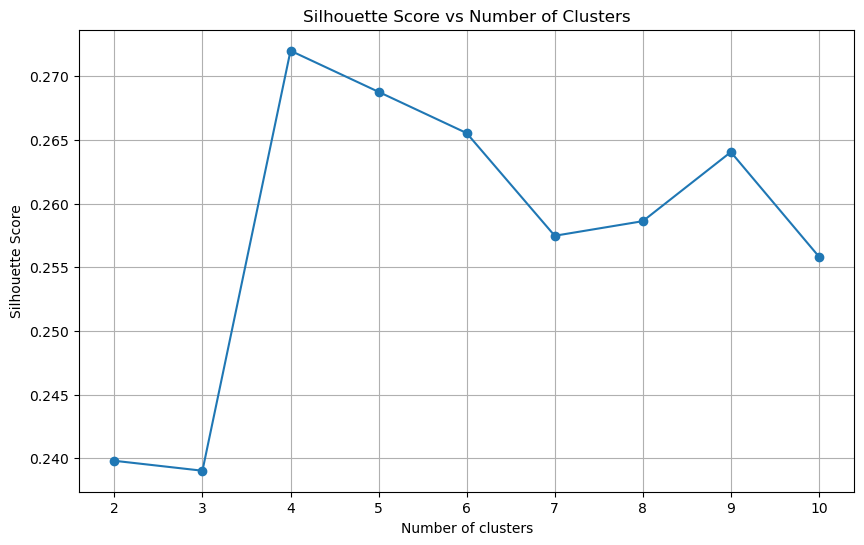

In [155]:
warnings.filterwarnings('ignore')

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(d_new_test)  
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(d_new_test, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### 2.4 KMeans to generate different segments of customers 

In [53]:
from sklearn.cluster import KMeans

In [56]:
k = 4

kmeans_model = KMeans(n_clusters=k, random_state=123, n_init=10).fit(d_new_test)


four_segments = pd.DataFrame(data=kmeans_model.cluster_centers_, columns=d_new_test.columns)


cluster_names = ['customer type 1', 'customer type 2', 'customer type 3', 'customer type 4']
four_segments.index = cluster_names

four_segments

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied
customer type 1,-0.033446,0.029090,2.054101,-0.572377,0.434137
customer type 2,-0.020464,-0.906861,-0.291458,-0.345386,0.432449
customer type 3,-0.000901,0.563440,-0.979871,2.772509,0.413408
customer type 4,0.035775,0.859110,-0.207679,-0.096516,0.429880


In [ ]:
1: Developmental Customers
2: General Customers
3: Core Customers 
4: VIP Customers

In [57]:
cluster_labels = kmeans_model.labels_
cluster_counts = [sum(cluster_labels == i) for i in range(k)]
four_segments['Cluster Count'] = cluster_counts

four_segments

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied,Cluster Count
customer type 1,-0.033446,0.029090,2.054101,-0.572377,0.434137,539
customer type 2,-0.020464,-0.906861,-0.291458,-0.345386,0.432449,1584
customer type 3,-0.000901,0.563440,-0.979871,2.772509,0.413408,358
customer type 4,0.035775,0.859110,-0.207679,-0.096516,0.429880,1419


#### In analyzing the customer segments, we have categorized them into four distinct groups based on their characteristics.
#### Firstly, the 'Developmental Customers' group (Cluster 1) represents customers who show the potential for growth. These customers exhibit the highest purchase frequency, indicating an interest in our products. However, their transaction history and discount utilization are relatively modest, suggesting that they are in the early stages of engagement with our brand.

#### Next, the 'General Customers' group (Cluster 2), which comprises customers with fairly average behaviors across the board. They have moderate purchase frequencies, transaction histories, and discount usage, making them typical or general customers.

#### The 'Core Customers' group (Cluster 3) consists of our most valuable customers. These customers have the longest transaction history with our store, signifying their loyalty and commitment. They also rank second in terms of the total number of transactions, indicating their consistent engagement. This group is instrumental to our business and can be considered our core customer base.

#### Lastly, the 'VIP Customers' group (Cluster 4) represents our most elite clientele. These customers exhibit the highest value in terms of Previous Purchases divided by the total count of transactions, emphasizing their significant contributions to our revenue. Additionally, their discount utilization rates are among the lowest, highlighting their willingness to pay full price for our products. These VIP customers are crucial for maintaining profitability and sustaining brand prestige.


In [58]:
segment_mapping = {
    'customer type 1': 'Developmental Customers',
    'customer type 2': 'General Customers',
    'customer type 3': 'Core Customers',
    'customer type 4': 'VIP Customers'
}


four_segments.index = four_segments.index.map(segment_mapping)

four_segments

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied,Cluster Count
Developmental Customers,-0.033446,0.029090,2.054101,-0.572377,0.434137,539
General Customers,-0.020464,-0.906861,-0.291458,-0.345386,0.432449,1584
Core Customers,-0.000901,0.563440,-0.979871,2.772509,0.413408,358
VIP Customers,0.035775,0.859110,-0.207679,-0.096516,0.429880,1419


### 2.5 make corresponding marketing strategy for each distinctive customers group

In [59]:
marketing_strategy_mapping = {
    'Developmental Customers': 'New customer zone, brand promotion',
   'General Customers': 'Retention strategies, offering coupons',
    'Core Customers': 'Rewards and gratitude for loyal customer',
 'VIP Customers': 'Enhanced services, word-of-mouth promotion'
}


four_segments['Marketing Strategy'] = four_segments.index.map(marketing_strategy_mapping)

four_segments

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied,Cluster Count,Marketing Strategy
Developmental Customers,-0.033446,0.029090,2.054101,-0.572377,0.434137,539,"New customer zone, brand promotion"
General Customers,-0.020464,-0.906861,-0.291458,-0.345386,0.432449,1584,"Retention strategies, offering coupons"
Core Customers,-0.000901,0.563440,-0.979871,2.772509,0.413408,358,Rewards and gratitude for loyal customer
VIP Customers,0.035775,0.859110,-0.207679,-0.096516,0.429880,1419,"Enhanced services, word-of-mouth promotion"


In [60]:
d_new.head(20)

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied
0,1.0,-0.285592,-0.785730,0.507370,-0.568032,1
1,28.0,-0.158932,-1.270255,-0.801402,-0.445216,1
2,45.0,-0.285592,1.360026,2.054101,-0.534892,1
3,119.0,-0.623353,0.114103,0.507370,-0.517346,1
4,131.0,-0.876674,-0.854948,0.507370,-0.571932,1
5,166.0,0.009949,-1.270255,-0.325485,-0.563484,1
6,244.0,1.698753,-1.477909,-0.325485,-0.588827,1
7,286.0,-0.876674,-1.547127,0.507370,-0.610921,1
8,343.0,-1.003334,1.567679,-0.801402,0.593851,1
9,351.0,0.347710,1.498462,0.507370,-0.439368,1


In [62]:
d_new_test.head(10)

,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied
0,-0.285592,-0.785730,0.507370,-0.568032,1
1,-0.158932,-1.270255,-0.801402,-0.445216,1
2,-0.285592,1.360026,2.054101,-0.534892,1
3,-0.623353,0.114103,0.507370,-0.517346,1
4,-0.876674,-0.854948,0.507370,-0.571932,1
5,0.009949,-1.270255,-0.325485,-0.563484,1
6,1.698753,-1.477909,-0.325485,-0.588827,1
7,-0.876674,-1.547127,0.507370,-0.610921,1
8,-1.003334,1.567679,-0.801402,0.593851,1
9,0.347710,1.498462,0.507370,-0.439368,1


### 2.6 Impement the label name of customer groups and strategy as a new group back into the original data.

In [63]:
d_new['Cluster'] = kmeans_model.predict(d_new.drop(['Customer ID'], axis=1))

In [64]:
d_new.head(10)

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied,Cluster
0,1.0,-0.285592,-0.785730,0.507370,-0.568032,1,1
1,28.0,-0.158932,-1.270255,-0.801402,-0.445216,1,1
2,45.0,-0.285592,1.360026,2.054101,-0.534892,1,0
3,119.0,-0.623353,0.114103,0.507370,-0.517346,1,3
4,131.0,-0.876674,-0.854948,0.507370,-0.571932,1,1
5,166.0,0.009949,-1.270255,-0.325485,-0.563484,1,1
6,244.0,1.698753,-1.477909,-0.325485,-0.588827,1,1
7,286.0,-0.876674,-1.547127,0.507370,-0.610921,1,1
8,343.0,-1.003334,1.567679,-0.801402,0.593851,1,3
9,351.0,0.347710,1.498462,0.507370,-0.439368,1,3


In [65]:
cluster_mapping = {
    0: {"name": "Developmental Customers", "strategy": "New customer zone, brand promotion"},
    1: {"name": "General Customers", "strategy": "Retention strategies, offering coupons"},
    2: {"name": "Core Customers", "strategy": "Rewards and gratitude for loyal customer"},
    3: {"name": "VIP Customers", "strategy": "Enhanced services, word-of-mouth promotion"}
}

In [66]:
d_new['Customer Group'] = d_new['Cluster'].apply(lambda x: cluster_mapping[x]['name'])
d_new['Marketing Strategy'] = d_new['Cluster'].apply(lambda x: cluster_mapping[x]['strategy'])


In [67]:
d_new.head(10)

,Customer ID,Purchase Amount (USD),Previous Purchases,Frequency of Purchases,LAST_TO_END,Discount Applied,Cluster,Customer Group,Marketing Strategy
0,1.0,-0.285592,-0.785730,0.507370,-0.568032,1,1,General Customers,"Retention strategies, offering coupons"
1,28.0,-0.158932,-1.270255,-0.801402,-0.445216,1,1,General Customers,"Retention strategies, offering coupons"
2,45.0,-0.285592,1.360026,2.054101,-0.534892,1,0,Developmental Customers,"New customer zone, brand promotion"
3,119.0,-0.623353,0.114103,0.507370,-0.517346,1,3,VIP Customers,"Enhanced services, word-of-mouth promotion"
4,131.0,-0.876674,-0.854948,0.507370,-0.571932,1,1,General Customers,"Retention strategies, offering coupons"
5,166.0,0.009949,-1.270255,-0.325485,-0.563484,1,1,General Customers,"Retention strategies, offering coupons"
6,244.0,1.698753,-1.477909,-0.325485,-0.588827,1,1,General Customers,"Retention strategies, offering coupons"
7,286.0,-0.876674,-1.547127,0.507370,-0.610921,1,1,General Customers,"Retention strategies, offering coupons"
8,343.0,-1.003334,1.567679,-0.801402,0.593851,1,3,VIP Customers,"Enhanced services, word-of-mouth promotion"
9,351.0,0.347710,1.498462,0.507370,-0.439368,1,3,VIP Customers,"Enhanced services, word-of-mouth promotion"


In [68]:
data_1 = data_1.merge(d_new[['Customer ID', 'Customer Group', 'Marketing Strategy']], on='Customer ID', how='left')

In [69]:
data_1.head(8)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Average,Median,Age Group,Customer Group,Marketing Strategy
0,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,...,Yes,Yes,14.0,Digital Wallets,Fortnightly,"$44,020","$49,719",Middle-Aged,General Customers,"Retention strategies, offering coupons"
1,28.0,56.0,Male,Shorts,Clothing,56.0,Kentucky,L,Cyan,Summer,...,Yes,Yes,7.0,Bank Transfer,Every 3 Months,"$44,020","$49,719",Seniors,General Customers,"Retention strategies, offering coupons"
2,45.0,39.0,Male,Hat,Accessories,53.0,Kentucky,S,Silver,Summer,...,Yes,Yes,45.0,Digital Wallets,Weekly,"$44,020","$49,719",Middle-Aged,Developmental Customers,"New customer zone, brand promotion"
3,119.0,50.0,Male,Sweater,Clothing,45.0,Kentucky,L,Orange,Fall,...,Yes,Yes,27.0,Cash,Bi-Weekly,"$44,020","$49,719",Middle-Aged,VIP Customers,"Enhanced services, word-of-mouth promotion"
4,131.0,44.0,Male,Scarf,Accessories,39.0,Kentucky,L,Violet,Fall,...,Yes,Yes,13.0,Digital Wallets,Fortnightly,"$44,020","$49,719",Middle-Aged,General Customers,"Retention strategies, offering coupons"
5,166.0,42.0,Male,Handbag,Accessories,60.0,Kentucky,S,Yellow,Winter,...,Yes,Yes,7.0,Cash,Monthly,"$44,020","$49,719",Middle-Aged,General Customers,"Retention strategies, offering coupons"
6,244.0,25.0,Male,Jewelry,Accessories,100.0,Kentucky,M,Olive,Winter,...,Yes,Yes,4.0,Card Payment,Monthly,"$44,020","$49,719",Young Adult,General Customers,"Retention strategies, offering coupons"
7,286.0,29.0,Male,Handbag,Accessories,39.0,Kentucky,XL,Yellow,Summer,...,Yes,Yes,3.0,Card Payment,Bi-Weekly,"$44,020","$49,719",Young Adult,General Customers,"Retention strategies, offering coupons"


### 2.7 Generated a new Excel spreadsheet saved to the local computer.

In [71]:
with pd.ExcelWriter('customer_groups_strategies.xlsx') as writer:
    for group_name, group_df in data_1.groupby('Customer Group'):
        group_df.to_excel(writer, sheet_name=group_name)

### 2.8 Visual Insights into Customer Group Distributions

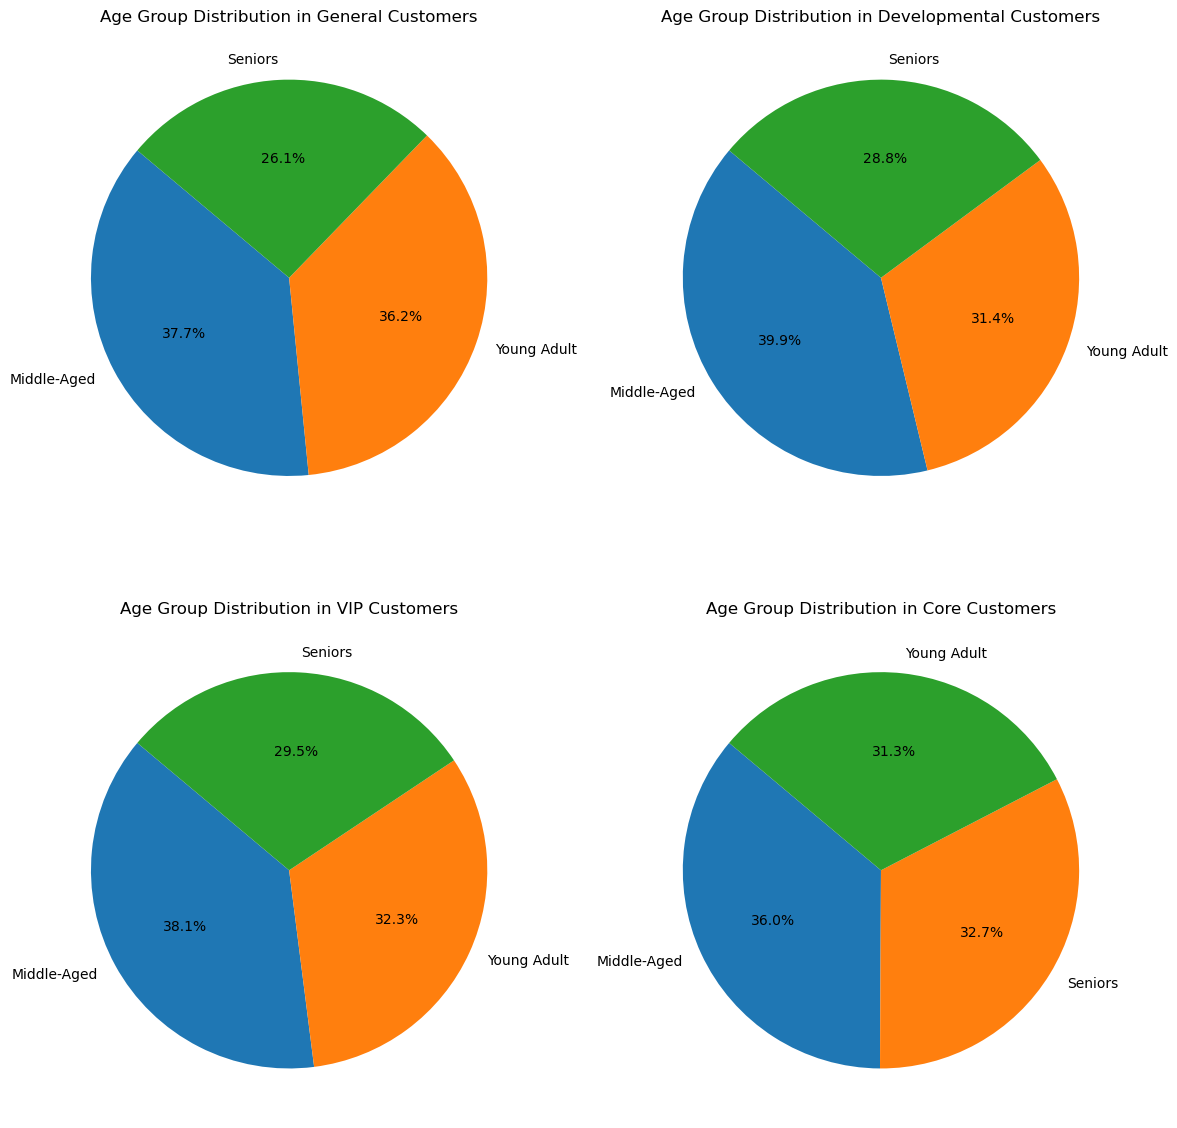

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
customer_groups = data_1['Customer Group'].unique()


for i, group in enumerate(customer_groups):

    group_data = data_1[data_1['Customer Group'] == group]
    age_group_counts = group_data['Age Group'].value_counts(
    ax = axes[i//2, i%2]
    ax.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Age Group Distribution in {group}')


plt.tight_layout(
plt.show()

In [ ]:
# Location

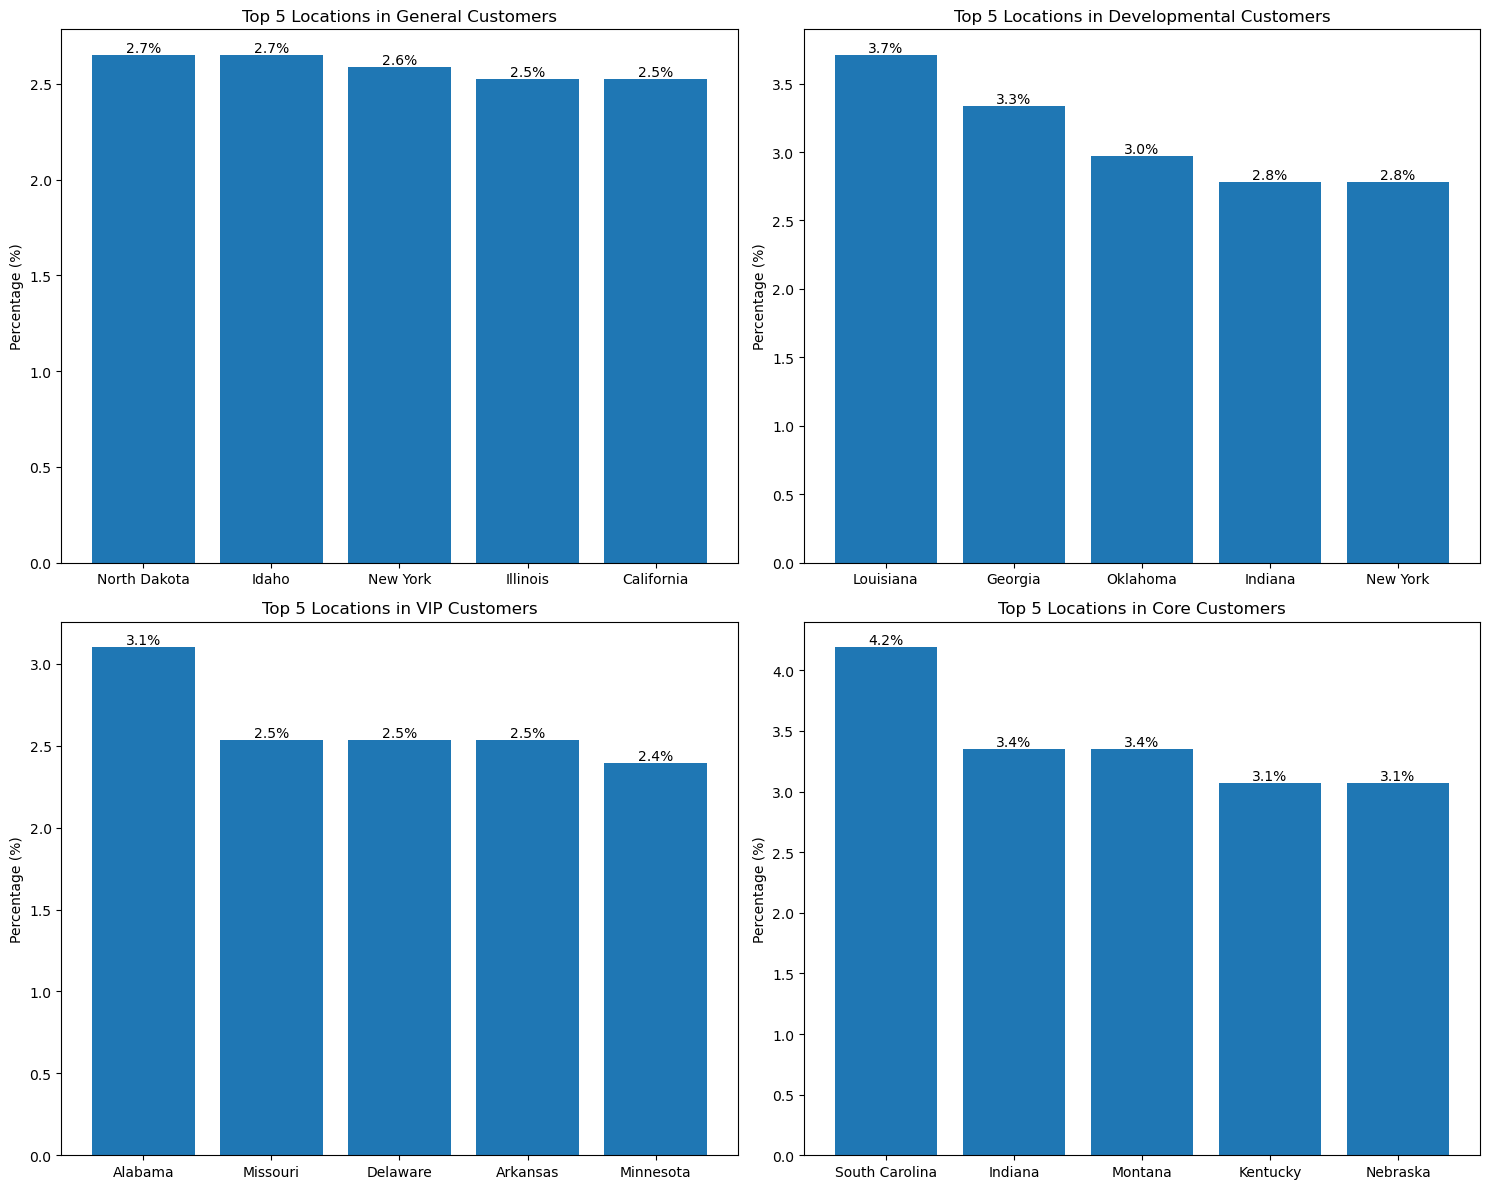

In [75]:
import matplotlib.pyplot as plt
customer_groups = data_1['Customer Group'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, group in enumerate(customer_groups):

    group_data = data_1[data_1['Customer Group'] == group]
    top_locations = group_data['Location'].value_counts().head(5)
    total_count = group_data['Location'].count()
    location_percentages = (top_locations / total_count) * 100
    ax = axes[i//2, i%2]
    ax.bar(location_percentages.index, location_percentages)

    for index, value in enumerate(location_percentages):
        ax.text(index, value, f'{value:.1f}%', ha='center', va='bottom')

    ax.set_title(f'Top 5 Locations in {group}')

    ax.set_ylabel('Percentage (%)')


plt.tight_layout()
plt.show()

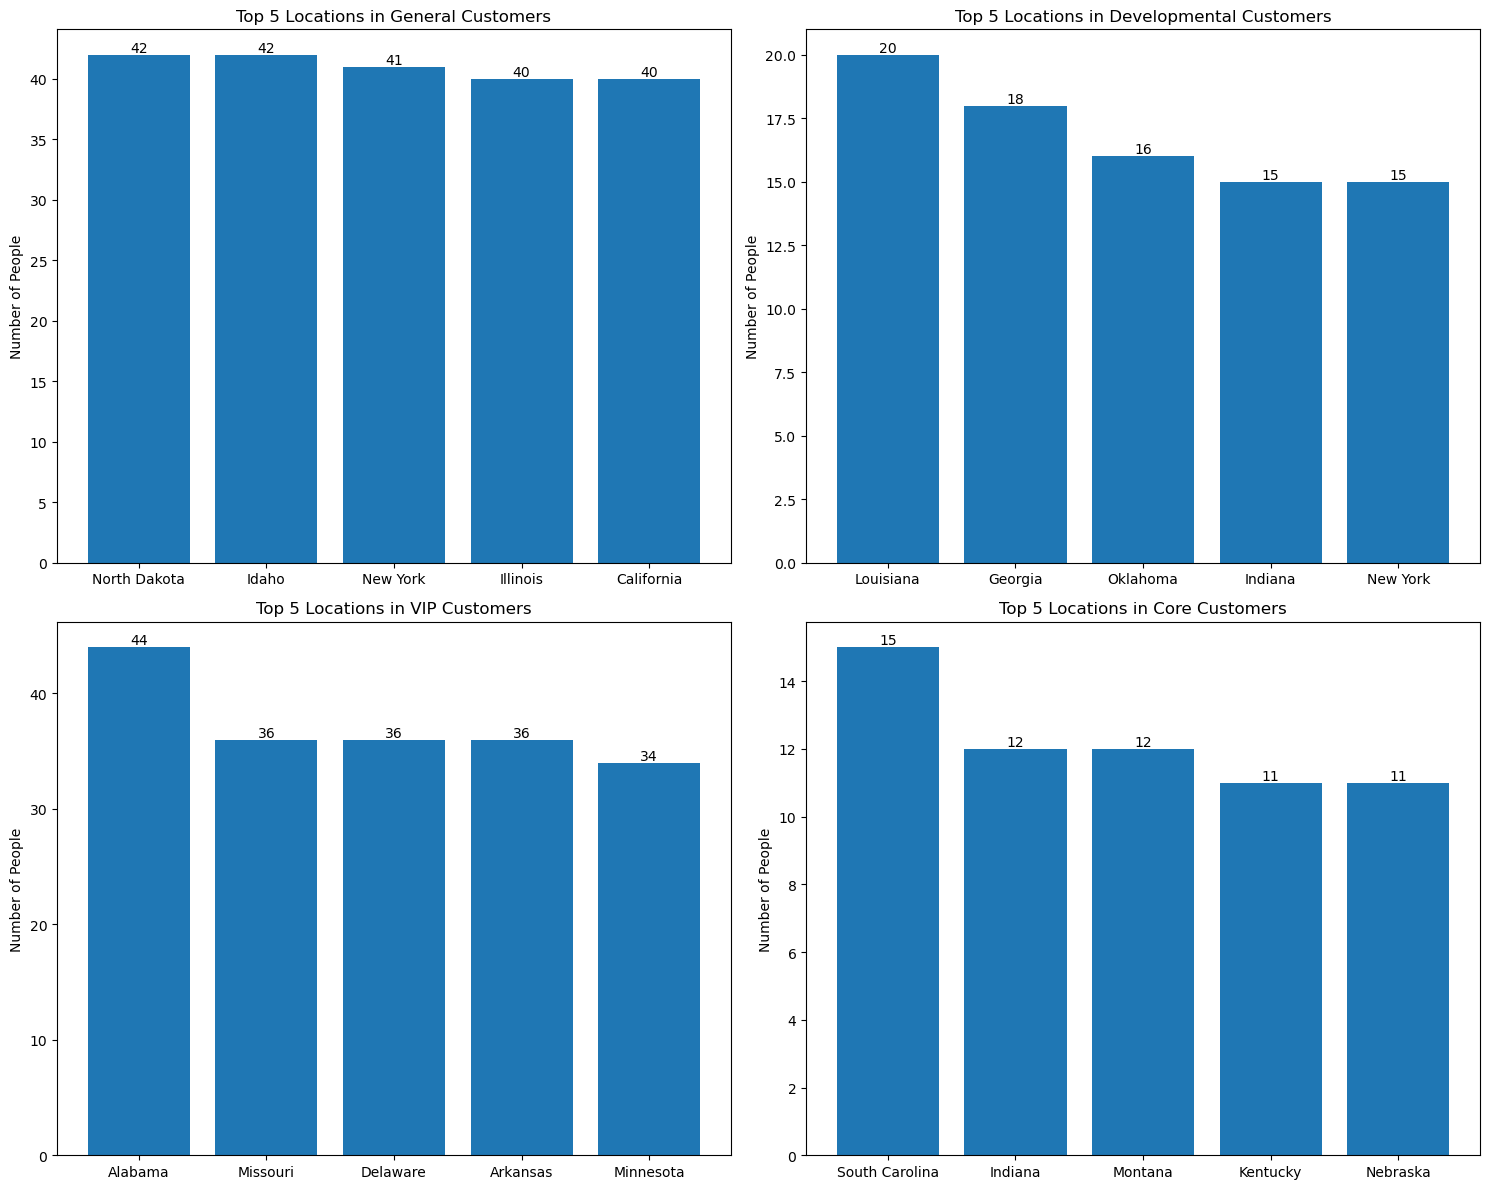

In [76]:
import matplotlib.pyplot as plt
customer_groups = data_1['Customer Group'].unique()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))


for i, group in enumerate(customer_groups):
    group_data = data_1[data_1['Customer Group'] == group]
    top_locations = group_data['Location'].value_counts().head(5)
    ax = axes[i//2, i%2]
    ax.bar(top_locations.index, top_locations)

    for index, value in enumerate(top_locations):
        ax.text(index, value, f'{value}', ha='center', va='bottom')

    ax.set_title(f'Top 5 Locations in {group}')
    ax.set_ylabel('Number of People')

plt.tight_layout()
plt.show()